<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

更新履歴：  
2023/10/15:
* 最小二乗法の関数をleast_squaresに変更
* 軸タイトルに日本語を表示する!pip install japanize-matplotlib 中止(都度実行する必要があるので)  

## 回帰  
例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

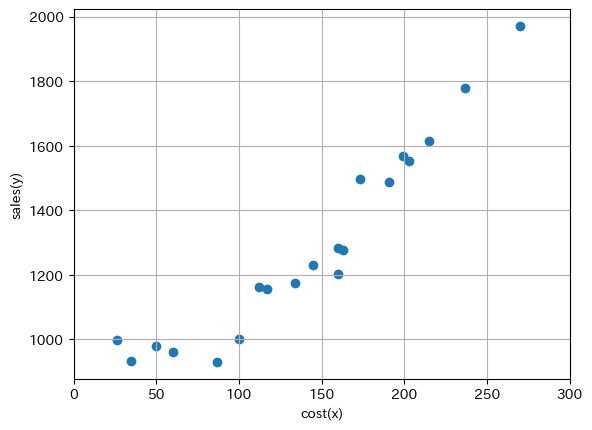

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("cost(x)")
plt.ylabel("sales(y)")
plt.scatter(x, y)

### 線形回帰モデル(単回帰分析)

$y = ax + b$ のaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 2
b= 800
J=1432989.0


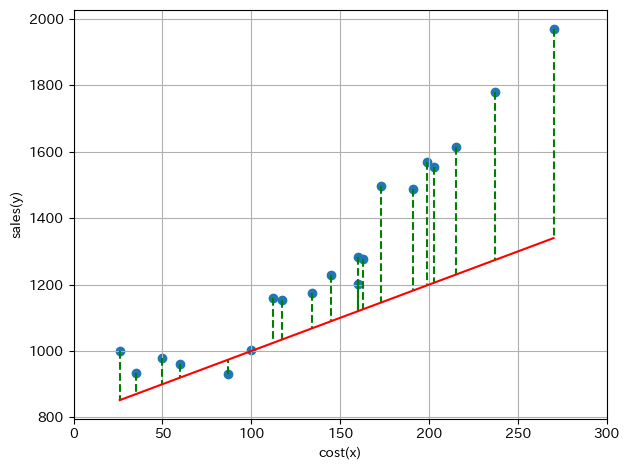

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

p = []
p.append(float(input('a= ')))  # 最初は2あたりから試す
p.append(float(input('b= ')))  # 最初は800あたりから試す

ylin = [estimate_func(p,i) for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

scipyライブラリを使って最小二乗法を実行してみる．



a=4.186227665537061,b=694.2336071727316
J=174154.4992816332


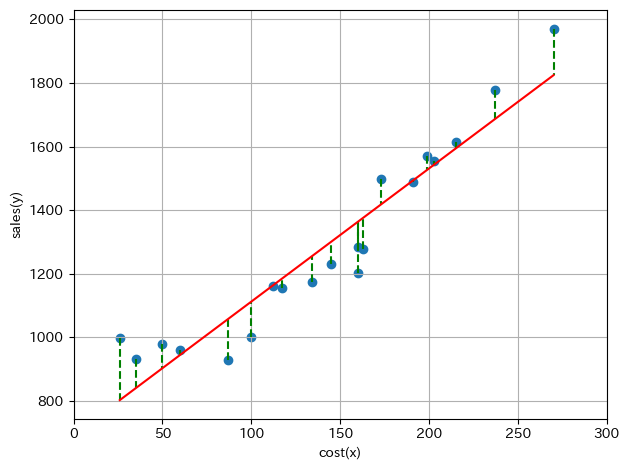

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 多項式回帰モデル(単回帰分析)

$y = ax^2 + bx + c$ のaとbとcを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 0.03
b= 0.2
c= 700
J=2473993.5859000003


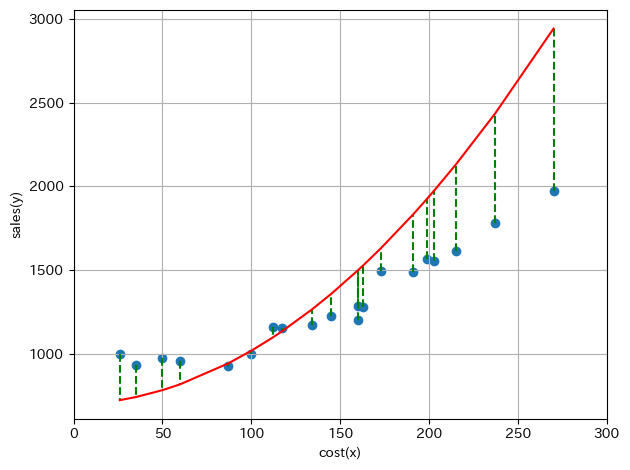

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

p = []
p.append(float(input('a= ')))  # 最初は0.03あたりから試す
p.append(float(input('b= ')))  # 最初は0.2あたりから試す
p.append(float(input('c= ')))  # 最初は700あたりから試す

ylin = [estimate_func(p,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

これもscipyライブラリを使って最小二乗法を実行してみる．

a=0.015897,b=-0.24561,c=932.57
J=58668.154113534634


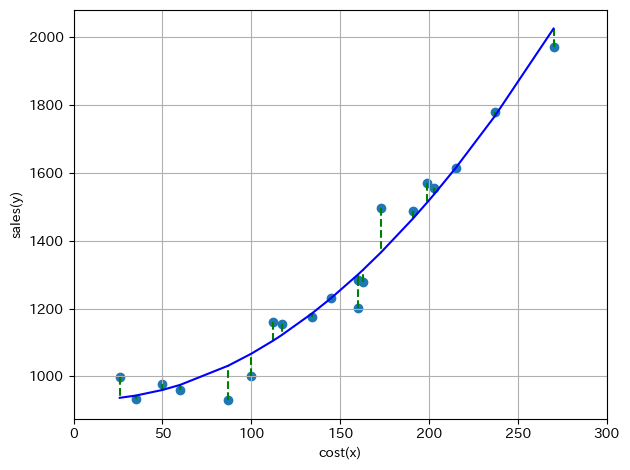

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0.03, 0.2, 700]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
print('a={:.5},b={:.5},c={:.5}'.format(a,b,c))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する (J = result.cost*len(x)でも直接計算可能)
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

**よっしゃ！6次関数にしてみよう！**  
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

a=2.9884e-11,b=-2.947e-08,c=1.1454e-05,d=-0.0022901,e=0.2691,f=-14.675,g=1227.0
J=46090.180389008616


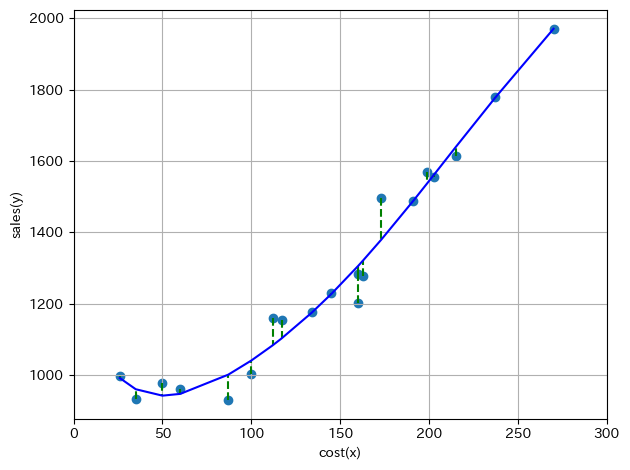

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

あんまり変わらない…

## 分類  
例題：ある昆虫のホルモン成分AとBの含有量から，雄と雌を分類する


### まずデータを可視化する

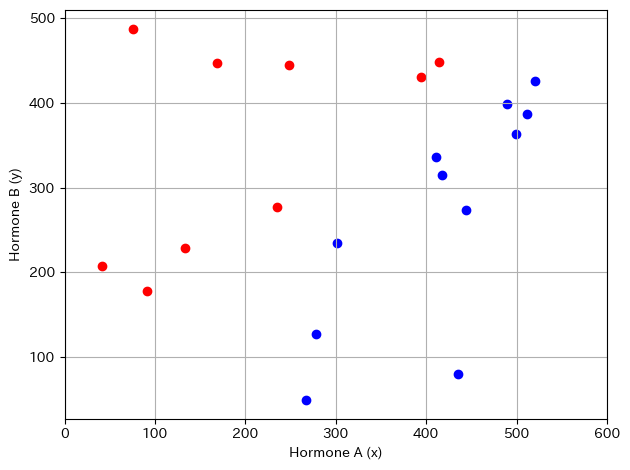

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
#axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 一次直線で分類してみる

$y = ax + b$ のaとbを変えて，緑の線で性別(赤と青の点)を分けてみよう．

a= 1.8
b= -100
3個が誤り


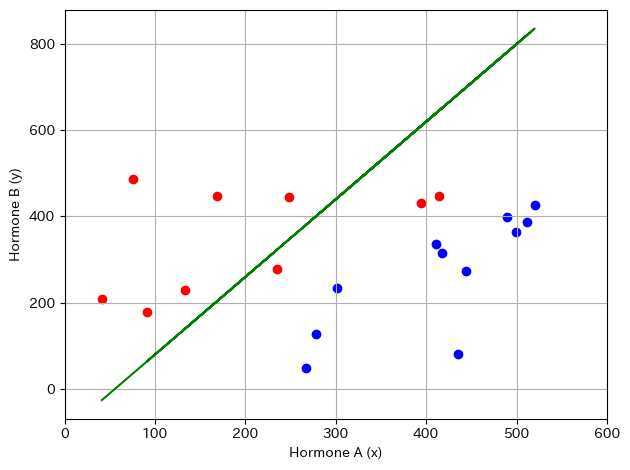

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

a = float(input('a= '))  # 最初は1.8あたりから試す
b = float(input('b= '))  # 最初は-100あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

residual = [p - q for p, q in zip(y, ylin)]

# 間違いのカウント
nerror = 0
for i in range(len(x)):
    if t[i]*residual[i]>0:
        nerror += 1
print('{}個が誤り'.format(nerror))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('Hormone A (x)')  # x軸ラベル
axe.set_ylabel('Hormone B (y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="g")
fig.tight_layout()  # レイアウトの設定
plt.show()

＜より複雑な分類に関する参考文献＞  
https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification


# 3.3 機械学習の基礎と展望(後半：損失，過学習…)

## 損失関数

二乗損失関数を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$1,4,8$であった．各々のモデルの二乗損失を求めよ．  
二乗損失関数は東大のスライドの通りとする．  
$l(f_w(x),y)=0.5(y-f_w(x))^2$

In [12]:
# 検算
y = 3
fw = float(input('fw(x)=)'))
print(0.5*(y-fw)**2)

fw(x)=)8
12.5


モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が小さいか考えよ．

ロジスティック損失を計算してみる．  
モデル$f_{w1}$，$f_{w2}$，$f_{w3}$があるとする．  
$x=10$のときの実際の$y$の値が3である．  
いっぽう，各々のモデルの予測値$f_{w1}(x)$，$f_{w2}(x)$，$f_{w3}(x)$は各々$-1,4,8$であった．各々のモデルのロジスティック損失を求めよ．  
損失関数は東大のスライドの通りとする．$log$は自然対数．  
$l(f_w(x),y)=log(1+exp(-yf_w(x)))$

In [22]:
# 検算
import math as m
y = 3
fw = float(input('fw(x)=)'))
print(m.log(1+m.exp(-y*fw)))

fw(x)=)8
3.7751357594826464e-11


計算結果の「e-n」は$10^{-n}$の意味である．  
例：3.1415e-7 → $3.1415×10^{-7}$

モデル$f_{w1}$，$f_{w2}$，$f_{w3}$のうち，どれが最も損失が大きいか考えよ．実際の値と予測値の符号の違いにも注意する．

#### コラム：予測と正解の差を表す名称  
* 損失関数 (loss function)  
* 誤差関数 (error function)  
* コスト関数 (cost function)  
* 目的関数 (objective function)  

ぶっちゃけ，最初はこれらは同じだと思って結構です．いずれも訓練時に用いられ，パラメータを変化させることによりモデルを向上させます．小さくなるほど「誤差」が少なく，良いモデルといえます．具体的な関数の名称(例えば平方根とか)ではないことに注意してください．  
  
これらとは別に「評価関数」(evaluation function)という言葉があります．損失関数らとは「いつ使うか」が異なります．訓練データではなく，実際のデータ(この後に取り扱う「検証データ」)を用いて，そのモデルの良し悪しを評価するときに使用します．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/machinelearning-func)  
  
なお，この章では東大のスライドの表現「損失関数」を使用します．

## 過学習

回帰モデルの「6次関数」    
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$  
訓練データが10個(もとは20個)だったら？

a=-1.3129e-09,b=9.94e-07,c=-0.00029096,d=0.041399,e=-2.9221,f=94.018,g=-73.91
J=11115.64663955019


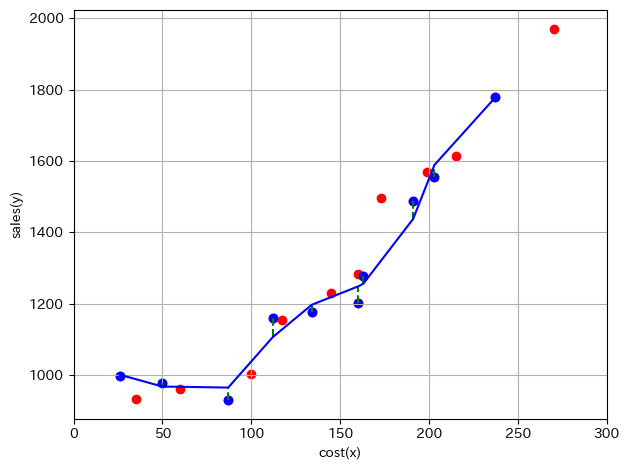

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# 10個に減らす
# xが広告費，yが売上高
x = [26,50,87,112,134,160,163,191,203,237]
y = [999,978,930,1161,1176,1203,1278,1488,1554,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

7個だったら？

a=-1.6995e-08,b=1.2589e-05,c=-0.0036578,d=0.52989,e=-39.8,f=1431.1,g=-1.7092e+04
J=2.638375281799137e-18


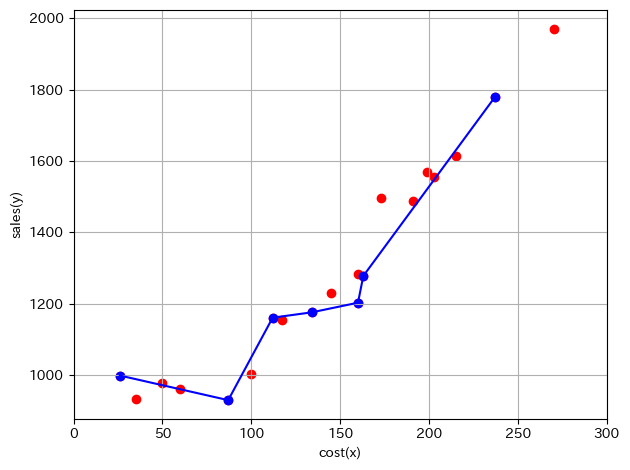

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# 7個に減らす
# xが広告費，yが売上高
x = [26,87,112,134,160,163,237]
y = [999,930,1161,1176,1203,1278,1779]

# 減らす前のデータ
xx = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
yy = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(xx,yy,c="r")
axe.scatter(x,y,c="b")
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

元の訓練データ(青色の点)が７つしかないのに，6次関数という複雑なモデルを用いた場合，訓練に用いたデータにはよく適合します(Jの値はほぼ０)  
しかし「まだ知らない」データ(橙色の点)には適合しません．  
損失はちいさいですが，これは良い学習といえるのでしょうか？？  
これを**「過学習 (overfit)」**といいます．

逆にモデルを単純化する．  
$y = ax + 1000$という，パラメータが1個しかないモデルを試してみよう．

J=511668.1879214037


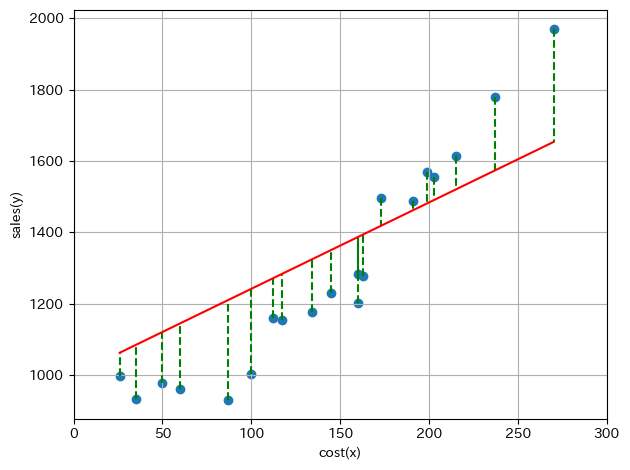

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x+1000)

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あまりに単純すぎるモデルを使うと，たとえ訓練データが多くてもフィットしません．これが過学習の逆の**「アンダーフィット (underfit)」**という現象です．

## 汎化

訓練データ(学習データ)のみならず，すべてのデータによくフィットすることをモデルの「汎化(はんか)」という．先ほどの回帰モデルの例のように，あまりにも複雑なモデルは訓練データにはよくフィットする(訓練損失(経験損失，訓練誤差)が小さくなる)が，訓練に用いなかったデータ(未知のデータ)に対する損失(汎化損失)は増えてしまう．

## 正則化

LASSO回帰で用いられる$L_1$正則化を試してみる．  
二次の回帰モデルで，適当に係数a,b,cを入れてみる．  
係数の値によって正則化項が求まり，それに係数λを乗じ，損失に追加したものが**正則化付き**経験損失となる．  
$L_1$正則化では，正則化項は単純に係数a,b,cの絶対値の和である．  
損失とλから，手計算でも確認するとよい．  
係数が大きくなるとモデルが複雑になるが，正則化付き経験損失を用いて最小化すれば，モデルの複雑さをある程度抑えることができる．

a= 0.03
b= 0.2
c= 700
損失=123699.67929500001
正則化項R=700.23
λ=10とすると
正則化付き損失=訓練損失＋λ×正則化項= 130701.97929500001


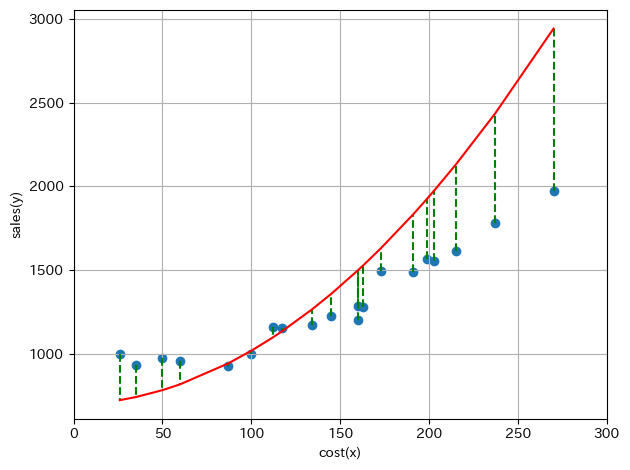

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

p = []
p.append(float(input('a= ')))  # 最初は0.03あたりから試す
p.append(float(input('b= ')))  # 最初は0.2あたりから試す
p.append(float(input('c= ')))  # 最初は700あたりから試す

ylin = [estimate_func(p,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
J /= len(x) # この節ではデータ数で割っています
print('損失={}'.format(J))
R = abs(p[0])+abs(p[1])+abs(p[2])
print('正則化項R={}'.format(R))
print('λ=10とすると')
print('正則化付き損失=訓練損失＋λ×正則化項=',format(J+10*R))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

## 検証データ (validation data)

実際にデータを「訓練データ」と「検証データ」に分けてみる．  
当然ながら，訓練誤差と検証誤差は異なる．

a=4.712528318218468,b=607.6602240867431
J/n(訓練データ)=6065.237739081114
J/n(検証データ)=8330.998131471293


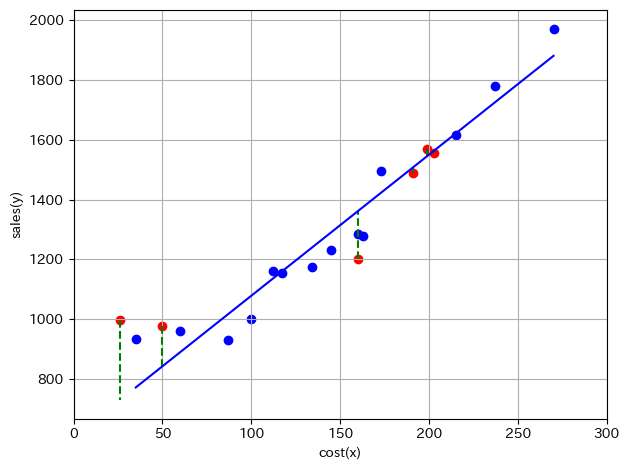

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
#x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
#y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 訓練データ(青丸)
x = [35,60,87,100,112,117,134,145,160,163,173,215,237,270]
y = [933,960,930,1002,1161,1155,1176,1230,1284,1278,1497,1614,1779,1971]

# 検証データ(赤丸)
xval = [26,50,191,199,203,160]
yval =[999,978,1488,1569,1554,1203]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]
ylinval = [estimate_func(result.x,i) for i in xval]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
J /= len(x)
print('J/n(訓練データ)={}'.format(J))

J = 0
for i in range(len(xval)):
    J += (ylinval[i]-yval[i])**2
J /= len(x)
print('J/n(検証データ)={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('cost(x)')  # x軸ラベル
axe.set_ylabel('sales(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y,color="b")
axe.scatter(xval,yval,color="r")
for i in range(len(xval)):
    axe.plot([xval[i],xval[i]],[yval[i],ylinval[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="b")
fig.tight_layout()  # レイアウトの設定
plt.show()

### コラム：データの名称  
「○○データ」も「○○関数」と同じように，似た概念があったり，解説者によって流儀や誤解があり，混乱している．  
* 学習データ(訓練データ, トレーニングデータ，training data)  
…モデルの学習そのものに用いるデータ．過学習の例では青い点．  
* 検証データ(ホールドアウトデータ, validation data)  
…汎化誤差を評価し，ハイパーパラメーター(人間が調整して入力するパラメータ)を調整するためのデータ．  
* テストデータ (test data)  
…最終的に出来上がったモデルの性能を評価するために，別に用意されたデータ．機械学習の参考文献ではあまり登場しないが，本番環境で使い物になるかどうかの評価においては，学習データや検証データを用いるべきではない．  

なお，「教師データ」という言い方もあり，「学習データ」とほぼ同じ意味で使用されているが，「教師無し学習」で「教師データ」とはよばない．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/ml-basic-data)

## 教師なし学習

### クラスタリング

東大の資料の「リテラシーレベル教材」の「4-9. データ活用実践（教師なし学習）」の例を使う．  
  
「卸売業者の顧客データ」を分析する．  
データには以下の情報が含まれる．  
* Fresh : ⽣鮮品の年間⽀出額  
* Milk : 乳製品の年間⽀出額  
* Grocery : ⾷料雑貨の年間⽀出額  
* Frozen : 冷凍⾷品の年間⽀出額  
* Detergents_Paper : 衛⽣⽤品と紙類の年間⽀出額  
* Delicassen : 惣菜の年間⽀出額  
* Channel : 販売チャネル(1=Horeca (ホテル等), 2=個⼈向け⼩売)  
* Region : 各顧客の地域(1=リスボン市, 2=ポルト市, 3=その他)  

#### 下準備  
次の手順でデータファイルをGoogle Colabにアップロードしてください．  

1. 次のURLを開き，右上の「DOWNLOAD」をクリックする．    
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
2. ファイル*wholesale+customers.zip*をダブルクリックする．
3. *Wholesale customers data.csv*というファイルをデスクトップにコピーする．  
4. Google Colabに戻る．左の上から4番目のファイルアイコンをクリックする．
5. 上に出てきた4つのアイコンのうちの一番左「セッションストレージにアップロード」をクリックする．
6. 「開く」ダイアログで，先ほどの*Wholesale customers data.csv*を選択し，「開く」をクリックする．このとき，間違って最初の*wholesale+customers.zip*を選ばないようにする．
7. Google Colabの画面左側に*Wholesale customers data.csv*が表示されれば成功．  



In [1]:
import pandas as pd
data_df = pd.read_csv('Wholesale customers data.csv')
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,15177,2024,3810,2665,232,610
1,2,3,44466,54259,55571,7782,24171,6465
2,2,3,7362,12844,18683,2854,7883,553
3,1,3,26400,1377,4172,830,948,1218
4,1,2,4414,1610,1431,3498,387,834


In [4]:
data_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
data_df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
cat_col = ['Channel','Region']
data_df = data_df.drop(cat_col,axis=1)

In [6]:
data_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
X = data_df.values
from sklearn.cluster import KMeans
objective_vals = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)
    km = km.fit(X)
    objective_vals.append(km.inertia_)

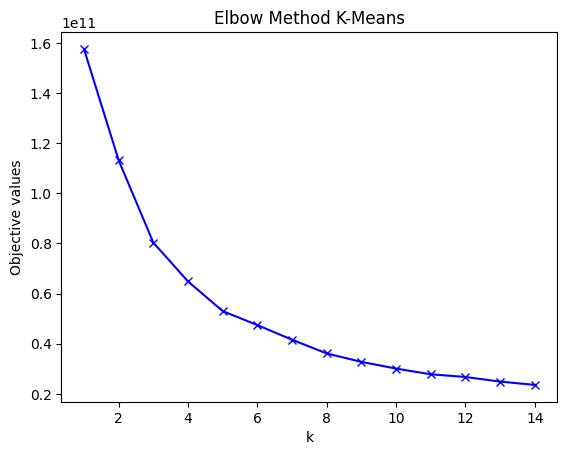

In [9]:
import matplotlib.pyplot as plt
plt.plot(K, objective_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Objective values')
plt.title('Elbow Method K-Means')
plt.show()

In [12]:
pred = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0).fit_predict(X)
data_df_ = pd.read_csv('Wholesale customers data.csv').drop(cat_col,axis=1)
data_df_['cluster']=pred
data_df_.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,4
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


In [14]:
data_df_['cluster'].value_counts()

1    224
0    104
4     81
2     24
3      7
Name: cluster, dtype: int64

In [15]:
data_df_.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,11700.346154,5074.798077,7485.846154,2843.086538,2795.000000,1513.230769
1,12221.602679,5781.977679,7320.924107,3194.401786,2434.388393,1607.629464
2,11375.625000,9168.666667,11101.833333,2909.791667,4391.000000,1320.625000
3,13637.857143,9321.571429,12282.714286,4679.857143,4086.571429,1840.428571
4,11816.987654,5458.222222,8984.246914,2936.160494,3677.580247,1344.197531


[Text(0, 0, 'cluster0'),
 Text(1, 0, 'cluster1'),
 Text(2, 0, 'cluster2'),
 Text(3, 0, 'cluster3'),
 Text(4, 0, 'cluster4')]

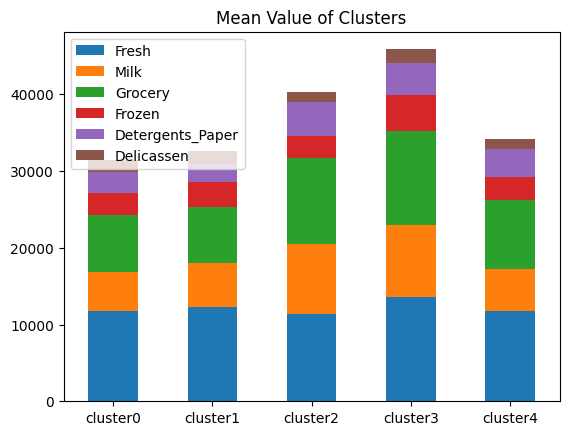

In [16]:
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['cluster'+str(i)] = data_df_[data_df_['cluster'] ==i].mean()
clusterinfo = clusterinfo.drop('cluster')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(),rotation=0)